In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('HeartDiseaseData.csv', index_col = 0)
data.head(5)

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [3]:
data.shape

(457, 13)

In [4]:
data.dtypes

ID            int64
Age           int64
Sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
num           int64
Place        object
dtype: object

In [5]:
data = data.drop(['ID'], axis=1)
data[data.columns[data.isna().any()].tolist()].dtypes

trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
dtype: object

In [6]:
data = data.fillna({'trestbps': data.trestbps.mean(), 'chol': data.chol.mean(), 'thalach': data.thalach.mean(),'oldpeak': data.oldpeak.mean()})
data = data.dropna(subset=['fbs', 'restecg', 'exang'])
data[data.columns[data.isna().any()].tolist()].dtypes

Series([], dtype: object)

In [7]:
data.shape

(369, 12)

In [8]:
data.describe() 

,Age,trestbps,chol,thalach,oldpeak,num
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,49.943089,132.376694,222.211841,135.303523,0.633513,0.422764
std,8.920513,18.212561,91.283437,24.558161,0.906074,0.494669
min,28.000000,92.000000,0.000000,69.000000,-0.500000,0.000000
25%,43.000000,120.000000,198.000000,118.000000,0.000000,0.000000
50%,51.000000,130.000000,224.000000,137.000000,0.000000,0.000000
75%,56.000000,140.000000,270.000000,150.000000,1.000000,1.000000
max,75.000000,200.000000,603.000000,190.000000,5.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124B6350>,
      dtype=object)

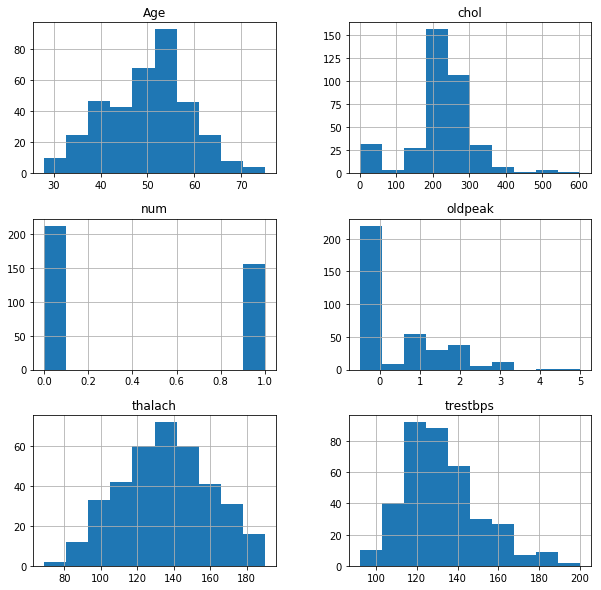

In [9]:
data.hist(figsize = (10,10))

In [10]:
y = data['num']
x = data.drop(['num'], axis = 1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

x = x.assign(Sex = le.fit_transform(x.Sex),
             cp = le.fit_transform(x.cp),
             fbs  = le.fit_transform(x.fbs),
             restecg = le.fit_transform(x.restecg),
             exang = le.fit_transform(x.exang),
             Place = le.fit_transform(x.Place))

In [11]:
clf = DecisionTreeClassifier()
clf.fit(x,y)
clf.score(x,y)

1.0

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(x,train_size=0.75)
y_train, y_test = train_test_split(y,train_size=0.75)

C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

1.0

In [14]:
clf.score(X_test,y_test)

0.5591397849462365

In [36]:
from sklearn import metrics
y_pred_en = clf.predict(X_test)
metrics.f1_score(y_test, y_pred_en)

0.4675324675324675

In [31]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(criterion='entropy')  
param_grid = [{'max_depth': list(range(1,10)), 'min_samples_split': list(range(2,10)) , 'min_samples_leaf': list(range(1,10))}]
search = GridSearchCV(estimator = dt, param_grid=param_grid, cv=10).fit(X_train,y_train)
best_tree = DecisionTreeClassifier(criterion='entropy',**search.best_params_)
best_tree.fit(X_train,y_train)
best_tree.score(X_test,y_test)

C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.5698924731182796

In [33]:
search.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [35]:
from sklearn import metrics
y_pred_en = best_tree.predict(X_test)
metrics.f1_score(y_test, y_pred_en)

C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0